In [3]:
# Loading Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Loading dataset
data=pd.read_csv('heart failure.csv')
df=data.copy()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.isnull().sum()#checking the missing value

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.shape
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# Analysis by visulization

<AxesSubplot:xlabel='smoking', ylabel='count'>

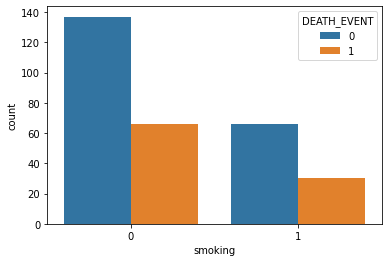

In [7]:
sns.countplot(x='smoking',hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

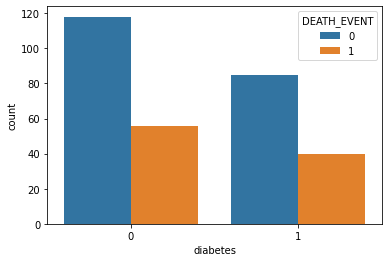

In [8]:
sns.countplot(x='diabetes',hue='DEATH_EVENT', data=df)

# Separating data for traing and testing

In [9]:
x=df.drop('DEATH_EVENT', axis=1)
y=df['DEATH_EVENT']

# Spliting train and test dataset

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=1)

In [11]:
xtrain.shape

(239, 12)

In [12]:
xtest.shape

(60, 12)

# Creating the Random Forest model

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model=RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [15]:
pred=model.predict(xtest)

In [16]:
pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [17]:
model.score(xtest,ytest)

0.9166666666666666

# Evaluting the Algorithm

In [39]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

In [40]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        46
           1       0.80      0.86      0.83        14

    accuracy                           0.92        60
   macro avg       0.88      0.90      0.89        60
weighted avg       0.92      0.92      0.92        60



In [41]:
model.score(xtest,ytest)

0.9166666666666666

In [52]:
accuracy=round(accuracy_score(ytest,pred),2)
print( 'Accuracy: ', accuracy*100,'%')

Accuracy:  92.0 %


# Confusion Matrix 

In [43]:
confusion_matrix=confusion_matrix(ytest,pred)
print(confusion_matrix)

[[43  3]
 [ 2 12]]


Text(0.5, 1.0, 'Confusion Matrix for Decission Tree')

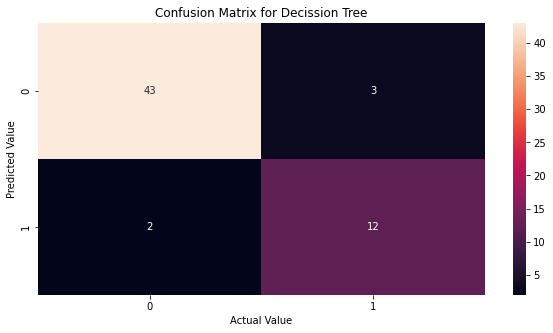

In [44]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel('Actual Value')
plt.ylabel("Predicted Value")
plt.title("Confusion Matrix for Decission Tree")

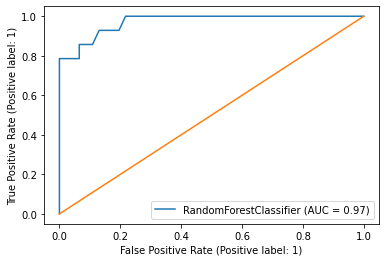

In [50]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, xtest, ytest)
plt.plot([0,1],[0,1])